In [1]:
run Lattice_functions.ipynb

In [174]:
Lat_Obj = Rect_Lattice(10, 10, 1, 1, [1, 10, 91, 100], [1, 10, 91, 100], [1, 10, 91, 100])

xp = np.random.randint(1, 180, size = 100)
for i in xp:
    Lat_Obj.springs[i - 1].l0 = 1.1

In [175]:
def Energy(Coordinates):
    nNodes = int(len(Coordinates)/3)
    x_vec = []
    y_vec = []
    z_vec = []
    
    for i in range(0, nNodes):
        x_vec.insert(i, Coordinates[i])
        y_vec.insert(i, Coordinates[i + nNodes])
        z_vec.insert(i, Coordinates[i + (2*nNodes)])
        
    energy = 0    
    for i in Lat_Obj.springs:
        energy = energy + (0.5*(i.k)*((Length(x_vec[i.i - 1], y_vec[i.i - 1], z_vec[i.i - 1], x_vec[i.j - 1], y_vec[i.j - 1], z_vec[i.j - 1]) - i.l0)**2))
    return energy

In [176]:
x0 = []
y0 = []
z0 = []
for i in Lat_Obj.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

In [177]:
lb = -np.inf*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in Lat_Obj.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in Lat_Obj.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in Lat_Obj.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

In [178]:
x0 = coord0
>>> res = minimize(Energy, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

`xtol` termination condition is satisfied.
Number of iterations: 313, function evaluations: 94213, CG iterations: 1683, optimality: 1.09e-06, constraint violation: 0.00e+00, execution time: 4.2e+01 s.


In [179]:
result = res.x

In [180]:
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

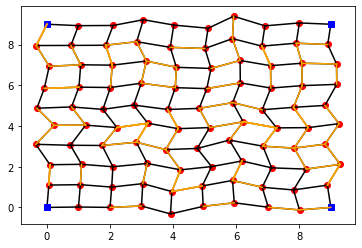

In [181]:
plt.plot(x, y, 'ro')
for i in range(1, 11):
    plt.plot(x[int(10*(i -1)): int(10*i)], y[int(10*(i -1)): int(10*i)], color="black")
    
for i in range(1, 11):
    h_line_x = []
    h_line_y = []
    for j in range(1, 11):
        h_line_x.append(x[(10*(j-1) + i - 1)])
        h_line_y.append(y[(10*(j-1) + i - 1)])
    
    plt.plot(h_line_x, h_line_y, color="black")


    
for i in [1, 10, 91, 100]:
    plt.plot(x[i - 1], y[i - 1], 'bs',)

    
for i in xp:
    if (Lat_Obj.nodes[Lat_Obj.springs[i-1].i].y != 9):
        plt.plot([x[Lat_Obj.springs[i-1].i], x[Lat_Obj.springs[i-1].j]], [y[Lat_Obj.springs[i-1].i], y[Lat_Obj.springs[i-1].j]], color = 'orange')

In [155]:
[x[Lat_Obj.springs[i].i], x[Lat_Obj.springs[i].i]]

[5.055938755588537, 5.055938755588537]

In [153]:
i

79

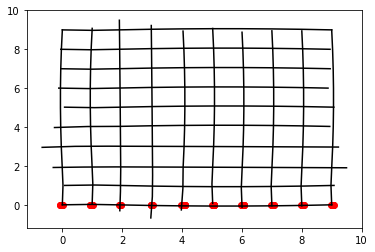

In [124]:
plt.plot(x, z, 'ro')
for i in range(1, 11):
    plt.plot(x[int(10*(i -1)): int(10*i)], y[int(10*(i -1)): int(10*i)], color="black")
    
for i in range(1, 11):
    plt.plot(y[int(10*(i -1)): int(10*i)], x[int(10*(i -1)): int(10*i)], color="black")

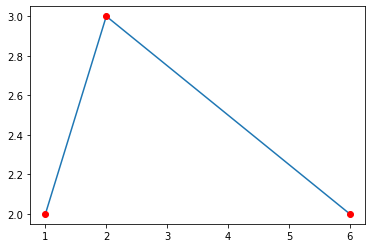

In [19]:
plt.plot([1, 2, 6] , [2, 3, 2])
plt.plot([1, 2, 6] , [2, 3, 2], 'ro')

AttributeError: 'list' object has no attribute 'ndim'

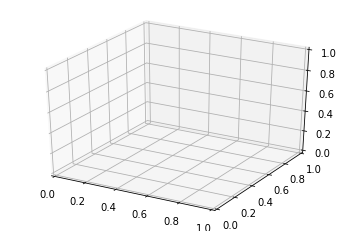

In [121]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(x, y, z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

ValueError: Argument Z must be 2-dimensional.

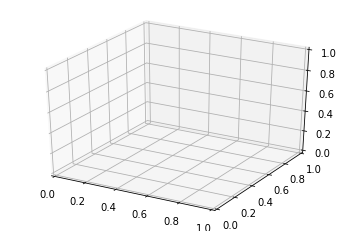

In [88]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(x, y, z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

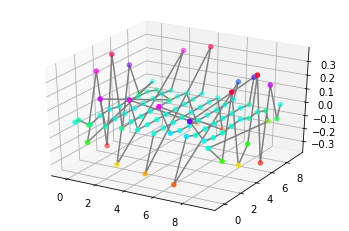

In [90]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(x, y, z, c=z, cmap='hsv');
ax.plot3D(x, y, z, 'gray')

plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
fig.show()


In [163]:
xp = np.random.randint(0, 179, size = 40)

In [164]:
len(xp)

40

In [165]:
xp

array([ 13,  32,  93, 105, 138, 123,  66, 163,  53,  80, 175,  10, 170,
        17, 145, 115,  40, 106,  59,   6,  59, 140,  79, 176,  68,  18,
       142,  47, 142,  97,  95, 132, 133, 142,  72,  21,  88, 130, 146,
       152])